In [1]:
#Import
import numpy as np
import tensorflow as tf
import random
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
#np.set_printoptions(threshold=np.nan)

from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('mnist-fashion')

#Dataset
#mnist = tf.contrib.learn.datasets.load_dataset("mnist")
train_data = data.train.images # Returns np.array
ou_train_labels = np.asarray(data.train.labels, dtype=np.int32)
test_data = data.test.images # Returns np.array
ou_test_labels = np.asarray(data.test.labels, dtype=np.int32)

Extracting mnist-fashion\train-images-idx3-ubyte.gz
Extracting mnist-fashion\train-labels-idx1-ubyte.gz
Extracting mnist-fashion\t10k-images-idx3-ubyte.gz
Extracting mnist-fashion\t10k-labels-idx1-ubyte.gz


In [2]:
fmnist_name = {
    0: "T-Shirt/Top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

In [3]:
def weight_variable(shape):
    return tf.Variable(tf.truncated_normal(shape, stddev=0.1))
def bias_variable(shape):
    return tf.Variable(tf.constant(0.1, shape=shape))

def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [4]:
def next_batch(num, data, labels):
    '''
    Return a total of `num` random samples and labels. 
    '''
    idx = np.arange(0 , len(data))
    np.random.shuffle(idx)
    idx = idx[:num]
    data_shuffle = [data[ i] for i in idx]
    labels_shuffle = [labels[ i] for i in idx]

    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

In [5]:
train_labels = []
test_labels = []

for i in range(len(ou_train_labels)):
    label_dat = np.zeros(10)
    label_dat[ou_train_labels[i]] = 1

    train_labels.append(label_dat)
    
for i in range(len(ou_test_labels)):
    label_dat = np.zeros(10)
    label_dat[ou_test_labels[i]] = 1

    test_labels.append(label_dat)

In [6]:
x = tf.placeholder(tf.float32, [None, 784])

x_image = tf.reshape(x, [-1, 28, 28, 1])
W_conv1 = weight_variable([5, 5, 1, 32])
b_conv1 = bias_variable([32])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

W_conv2 = weight_variable([5, 5, 32, 64])
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

W_fc1 = weight_variable([7 * 7 * 64, 1024])
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

W_fc2 = weight_variable([1024, 64])
b_fc2 = bias_variable([64])

h_fc2 = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

W_fc3 = weight_variable([64, 10])
b_fc3 = bias_variable([10])

y = tf.matmul(h_fc2, W_fc3) + b_fc3

result = tf.nn.softmax(y)

y_ = tf.placeholder(tf.float32, [None, 10])

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_, logits=y))
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

In [7]:
init = tf.global_variables_initializer()

sess = tf.InteractiveSession()
sess.run(init)

saver = tf.train.Saver()

In [8]:
#Load the model
saver.restore(sess, "./tf-models/mnist-fashion.ckpt")

In [8]:
try:    
    while True:
        test_batch =next_batch(25, test_data, test_labels)
        train_batch = next_batch(25, train_data, train_labels)
        te = cross_entropy.eval(feed_dict={x: test_batch[0], y_: test_batch[1], keep_prob: 1.0})
        tee = cross_entropy.eval(feed_dict={x: train_batch[0], y_: train_batch[1], keep_prob: 1.0})
        print("\rtest error %g, train error %g"%(te, tee), end="")
        for i in range(11):
            batch = next_batch(100, train_data, train_labels)
            sess.run(train_step, feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.4})
except KeyboardInterrupt:
    print("")
test_batch =next_batch(75, test_data, test_labels)
train_batch = next_batch(75, train_data, train_labels)
te = cross_entropy.eval(feed_dict={x: test_batch[0], y_: test_batch[1], keep_prob: 1.0})
tee = cross_entropy.eval(feed_dict={x: train_batch[0], y_: train_batch[1], keep_prob: 1.0})
print("test error %g, train error %g"%(te, tee), end="")

test error 0.42844, train error 0.6389828
test error 0.420159, train error 0.46614

In [9]:
#Save the model
saver.save(sess, "./tf-models/mnist-fashion.ckpt")

'./tf-models/mnist-fashion.ckpt'

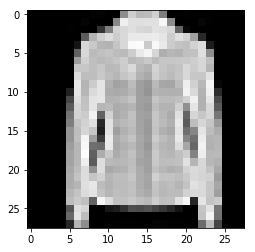

suggested label: Coat
confidence: 51%
correct label: Coat
T-Shirt/Top     0.00	 0
Trouser         0.00	 0
Pullover        0.38	 0
Dress           0.00	 0
Coat            0.51	 1
Sandal          0.00	 0
Shirt           0.11	 0
Sneaker         0.00	 0
Bag             0.00	 0
Ankle boot      0.00	 0



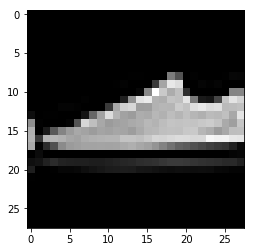

suggested label: Sneaker
confidence: 100%
correct label: Sneaker
T-Shirt/Top     0.00	 0
Trouser         0.00	 0
Pullover        0.00	 0
Dress           0.00	 0
Coat            0.00	 0
Sandal          0.00	 0
Shirt           0.00	 0
Sneaker         1.00	 1
Bag             0.00	 0
Ankle boot      0.00	 0



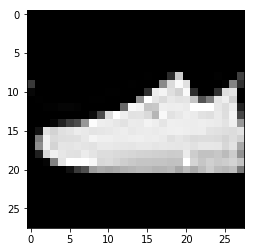

suggested label: Sneaker
confidence: 97%
correct label: Sneaker
T-Shirt/Top     0.00	 0
Trouser         0.00	 0
Pullover        0.00	 0
Dress           0.00	 0
Coat            0.00	 0
Sandal          0.01	 0
Shirt           0.00	 0
Sneaker         0.97	 1
Bag             0.00	 0
Ankle boot      0.02	 0



In [10]:
image = random.randint(0,len(test_data)-5)

#num = int(input("How many pictues shall be shown?"))
num = 3
res = sess.run(result, feed_dict={x: test_data[image:image+num], keep_prob: 1})

#print(test_data[0])

for j,e in enumerate(res):
    data = []
    for i in range(28):
        tmp = []
        for k in range(28):
            tmp.append([test_data[image+j][28*i+k-1],test_data[image+j][28*i+k-1],test_data[image+j][28*i+k-1]])
        data.append(tmp)
    dat = np.array(data, dtype=np.float32)
    plt.imshow(dat)
    plt.show()
    
    print("suggested label: {:s}\nconfidence: {:.0f}%\ncorrect label: {:s}".format(fmnist_name[e.argmax()], e.max()*100, fmnist_name[test_labels[image+j].argmax()]))
    
    for i in range(10):
        print("{:15s} {:1.2f}\t {:1.0f}".format(fmnist_name[i], e[i], test_labels[image+j][i]))
    print()